<center><img src="images/logo.png" alt="AWS Logo" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# Application of Deep Learning to Text and Image Data
## Module 1, Lab 1, Notebook 2: Examining a Neural Network Architecture

In this notebook, you will implement a minimum viable neural network to see the different architecture components.

The simplest possible neural network architecture is logistic regression. This lab will cover data ingestion, how to define the model, loss function, and the optimization algorithm. Although modern deep learning frameworks can automate nearly all of this work, you will only using matrix multiplications and automatic differentiation to build, train, and test a logistic regression model.

You will do the following:

- Generate a simulated dataset
- Use basic components of a neural network
- Implement a neural network by using PyTorch
- Train a neural network

---

You will be presented with activities throughout the notebook: <br/>

|<img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| 
| --- | 
|<p style="text-align:center;"> No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p>|


---
## Index

* [Simulated dataset](#Simulated-dataset)
* [Neural network basics](#Neural-network-basics)
* [Implementing a neural network with PyTorch](#Implementing-a-neural-network-with-PyTorch)
* [Training of the neural network](#Training-of-the-neural-network)

---
## Simulated dataset

In this example, you will train a neural network on a dataset that is randomly generated. The dataset will have two classes, and you will train the neural network to classify them.

In [1]:
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
# Load the sample data
from sklearn.datasets import make_circles

# Specify settings, including how many examples to extract
X, y = make_circles(
    n_samples=750, shuffle=True, random_state=42, noise=0.05, factor=0.3
)

Plot the simulated dataset.

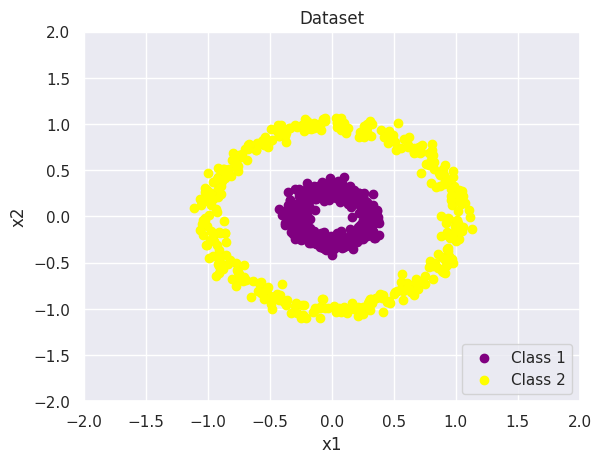

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


def plot_dataset(X, y, title):

    # Activate the Seaborn visualization
    sns.set()

    # Plot both classes: Class 1 is blue, Class 2 is red
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c="purple", label="Class 1")
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c="yellow", label="Class 2")
    plt.legend(loc="lower right")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title(title)
    plt.show()


plot_dataset(X, y, title="Dataset")

The goal is to build a neural network that can differentiate between the two classes in the dataset. The simplest neural network that can tackle this problem is a single-layer neural network, basically a logistic regression.

In [8]:
import torch

# Use a GPU resource if available; otherwise, use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# To work with PyTorch, you need to convert the dataset to tensors first
X = torch.tensor(X, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).reshape((-1, 1)).to(device)

---
## Neural network basics

The fundamental building blocks of neural networks are *neurons*, which are functions that are followed by an activation function. It's common for the initial function to be a linear regression and the activation function to be a sigmoid.

<img style="float: center;" src="images/single_layer.png" alt="Neuron with activation function" width="500"/>

Your first goal is to implement a simple neural network with one neuron that uses the sigmoid function as the activation function to predict class 1 or class 2 from the sample dataset.

As an equation, this would look like the following: For some input $\mathbf{X}$ and output $\mathbf{y}$, the logistic regression model is defined as:

$$
\mathbf{\hat{y}} = \sigma(\mathbf{X}\mathbf{w} + \mathbf{b}),
$$

with some initial choices for the parameters, $\mathbf{w}$ weights matrix and bias $\mathbf{b}$.

You don't know what the best values for $\mathbf{w}$ and $\mathbf{b}$ are, so initialize the weights matrix $\mathbf{w}$ at random with zero mean and standard deviation 1, and let the bias take the initial value 0.

In [9]:
# Define the logistic regression
def log_reg(X, w, b):
    return torch.sigmoid(torch.matmul(X, w) + b)


# Define the basic neural network
net = log_reg

# Initialize for w and b
w = torch.normal(0, 1, size=(2, 1), requires_grad=True).to(device)
b = torch.zeros(1, requires_grad=True).to(device)

# To test the neural net, pass in an example data point
print(
    f"For datapoint 0, the probability of being class 1 is {float(net(X[0], w, b).item()):.2f}."
)

For datapoint 0, the probability of being class 1 is 0.31.


This is a basic single-layer neural network that hasn't been trained yet. Ultimately, the goal is to find the best possible values for $\mathbf{w}$ and $\mathbf{b}$. You need to choose a loss function that systematically evaluates how good the predictions are and an optimization method that updates the weight and bias values. You can do this manually, but PyTorch has built-in features to do this automatically.

In [10]:
# Import system library and append path
import sys

sys.path.insert(1, "..")

# Import utility functions that provide answers to challenges
from MLUDTI_EN_M1_Lab1_quiz_questions import *

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">It's time to check your knowledge. To load the question, run the following cell.</p>
    <br>
</div>

In [11]:
# Run this cell to display the question and check your answer
question_4

---
## Implementing a neural network with PyTorch

Now you need to build, train, and validate a neural network in PyTorch. With PyTorch, you can list the different layers and activation functions that you want to use, in the sequence that you want them to run. For more information, see the [PyTorch documentation](https://pytorch.org/docs/stable/index.html).

You can use the `Sequential()` function to define the functions in the order that you want them to run. The first row refers to the first function to be used, followed by an activation function. You can chain together as many functions as you want to create your final model output. For more information, see [torch.nn Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) in the PyTorch documentation.

In [12]:
from torch import nn

# Create a sequential container that chains a linear regression function with a sigmoid activation function
net = nn.Sequential(
    nn.Linear(2, 1),  # Linear layer-1 with 1 out_features and input size 2
    nn.Sigmoid(),  # Sigmoid activation function
)

### Initialization

Before you continue, you need to initialize PyTorch values. This is important for the same reason that you initialized values for $\mathbf{w}$ and $\mathbf{b}$.

Picking the starting point is critical. Researchers have developed several initialization strategies that you can use. The _Xavier initialization_ is commonly used because it can keep the scale of gradients roughly the same in all the layers, which helps to keep the gradient from vanishing or exploding.

For a list of initializers, see the [PyTorch documentation](https://pytorch.org/docs/stable/nn.init.html). For information about Xavier initialization, see [Xavier Initialization](https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html#xavier-initialization) on the Dive into Deep Learning site.

In [13]:
# Initialize the weights with an Xavier initializer
def xavier_init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)

# Apply the initialization to the sequential network that you created earlier
net.apply(xavier_init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

### Loss function

Now that you have set up a neural network, you need to select a loss function to quantify how good a given selection of parameters are. Many loss functions exist, and you need to select one that suits the prediction problem, which is classificiation in this case. For information about loss functions, see the [Dive into Deep Learning site](https://d2l.ai/chapter_linear-regression/linear-regression.html#loss-function).

Binary cross-entropy loss (log loss) is a loss function that is commonly used for binary classification:

```python
loss = nn.BCELoss()
```

During the training of the neural network, the initial model parameters will be updated until model predictions fit the data sufficiently well. One way to control for this is by setting the number of epochs that the model trains for. If large changes occur in the output quality, you can increase the number of epochs and train the model for longer.

For a full list of supported loss functions, see [torch.nn Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions) in the PyTorch documentation.

### Optimization method
Each update requires taking the gradient of the loss function with respect to the parameters. Automatic differentiation is used to compute the gradient, and given this gradient, each parameter is updated in the direction that might reduce the loss.

The `torch.optim` module provides necessary optimization algorithms for neural networks. You can use an optimizer to train a network by using the stochastic gradient descent (SGD) method and setting the learning rate at 0.001. For more information, see [Stochastic Gradient Descent](https://d2l.ai/chapter_optimization/sgd.html) on the Dive into Deep Learning site.

```python
from torch import optim
optimizer = optim.SGD(net.parameters(), lr=0.001)
```

Three lines of code are required to perform a gradient descent update:

```
loss.backward() # Compute updates for each parameter
optimizer.step() # Make the updates for each parameter
optimizer.zero_grad() # Clean-up step for PyTorch
```

---
## Training of the neural network

Now that you have all the components, you can create a loop that takes a given set of parameter values, creates outputs, evaluates the performance, and updates the parameters accordingly until it has completed a set number of iterations (epochs). Repeating the training for more epochs should further improve the model. However, some additional considerations impact how much the model will improve. One example is the number of data points that you want to evaluate per iteration.

Start by looking at the basic network again.

In [14]:
# Print network
net.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

Next, specify the loss function, optimization method, and how many epochs (loops) are run to update the parameters.

In [15]:
num_epochs = 50  # Total number of epochs (loops)

# Define the loss. Because you used sigmoid in the last layer, use nn.BCELoss.
# Otherwise, you could have used nn.BCEWithLogitsLoss. This loss combines a sigmoid layer and the BCELoss in a single class.
loss = nn.BCELoss(reduction="none")

# Define the optimizer, SGD with learning rate
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

Finally, it is time for training! 

Training will run through the dataset 50 times, and print training and validation losses after each epoch.

In [16]:
train_losses = []
for epoch in range(num_epochs):
    training_loss = 0
    # Zero the parameter gradients
    optimizer.zero_grad()
    output = net(X)
    L = loss(output, y).sum()
    training_loss += L.item()
    L.backward()
    optimizer.step()
    training_loss = training_loss / len(y)
    train_losses.append(training_loss)

Now that training has completed, you can plot the training and validation loss plots.

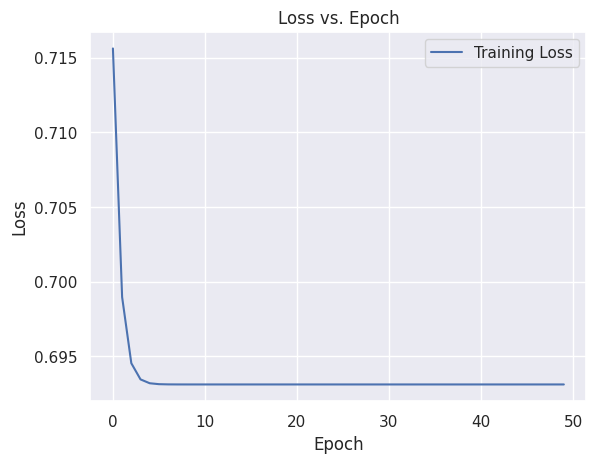

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(train_losses, label="Training Loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Notice that the loss (errors) decreases as the training process continues, as expected.

One final step is to compare this plot to the validation loss to see if it is overfitting the model.

----
## Conclusion

In this notebook, you learned about training a neural network. You should now understand the basic steps of building a neural network and how to evaluate its performance.

--- 
## Next lab
In the next lab, you will learn about the multilayer perceptron, which is the simplest feed-forward neural network architecture, and how to use dropout layers to prevent overfitting.